# Dataset

In [7]:
# Social_Network_Ads.csv
# location: https://mitu.co.in/dataset

In [2]:
# import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [5]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


# Separate input and output variables

In [8]:
#dependent variable is Purchased and independent variables are id, gender, age, and estimated salary
#here our features is age and estimated salary

In [18]:
x = df[['Age', 'EstimatedSalary']] 
y =df['Purchased']


In [65]:
x.shape


(400, 2)

In [185]:
x.describe

<bound method NDFrame.describe of       Age  EstimatedSalary
0    19.0          19000.0
1    35.0          20000.0
2    26.0          43000.0
3    27.0          57000.0
4    19.0          76000.0
..    ...              ...
395  46.0          41000.0
396  51.0          23000.0
397  50.0          20000.0
398  36.0          33000.0
399  49.0          36000.0

[400 rows x 2 columns]>

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [20]:
set(y)

{0, 1}

In [21]:
np.unique(y)

array([0, 1], dtype=int64)

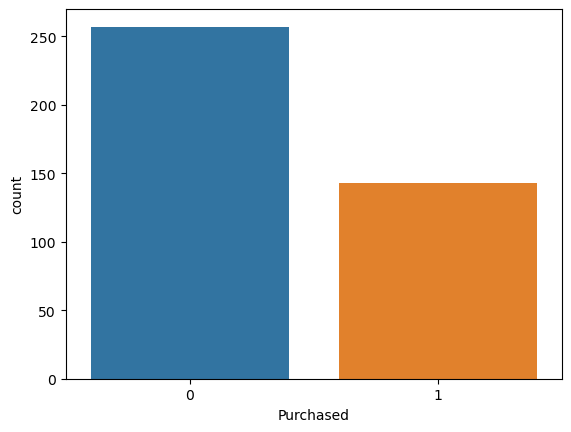

In [44]:
sns.countplot(x=y, palette='tab10');

In [27]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

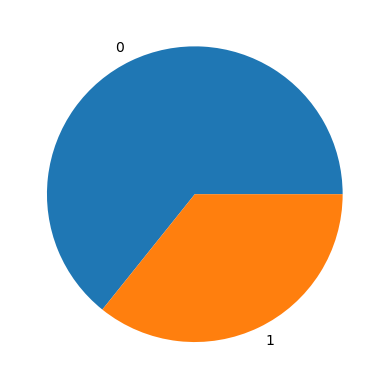

In [37]:
plt.pie(y.value_counts(), labels=y.value_counts().index);

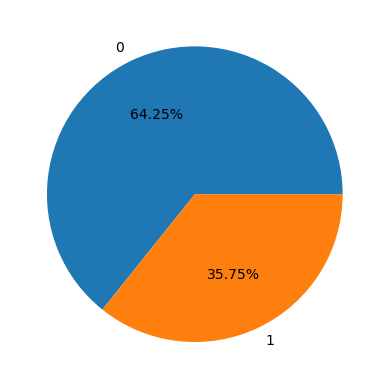

In [36]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct= '%2.2f%%');

In [38]:
m= df['Gender']

In [39]:
m

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [186]:
np.unique(m)

array(['Female', 'Male'], dtype=object)

In [41]:
m.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

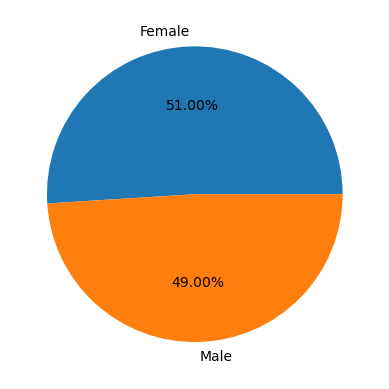

In [43]:
plt.pie(m.value_counts(), labels=m.value_counts().index, autopct= '%2.2f%%');

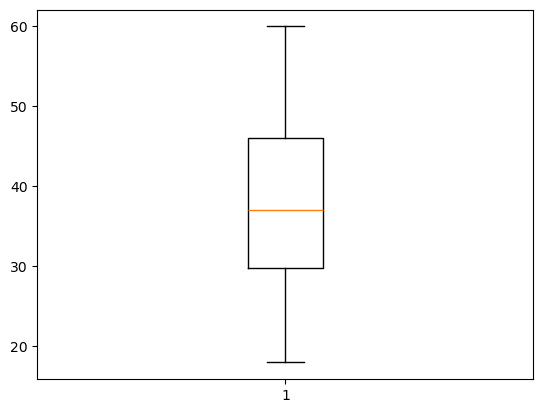

In [51]:
plt.boxplot(df['Age']);

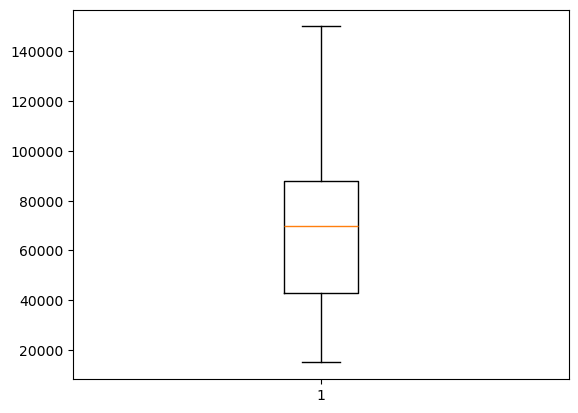

In [53]:
plt.boxplot(df['EstimatedSalary']);

(array([  0.,  12.,  88., 138., 109.,  53.]),
 array([ 0., 10., 20., 30., 40., 50., 60.]),
 <BarContainer object of 6 artists>)

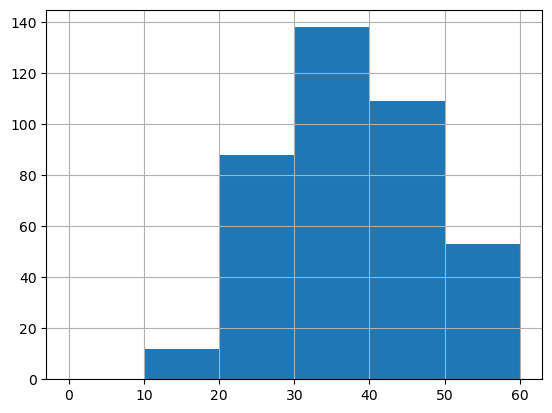

In [56]:
plt.xticks(range(0,61,10))
plt.grid()
plt.hist(df['Age'], range(0,61,10))

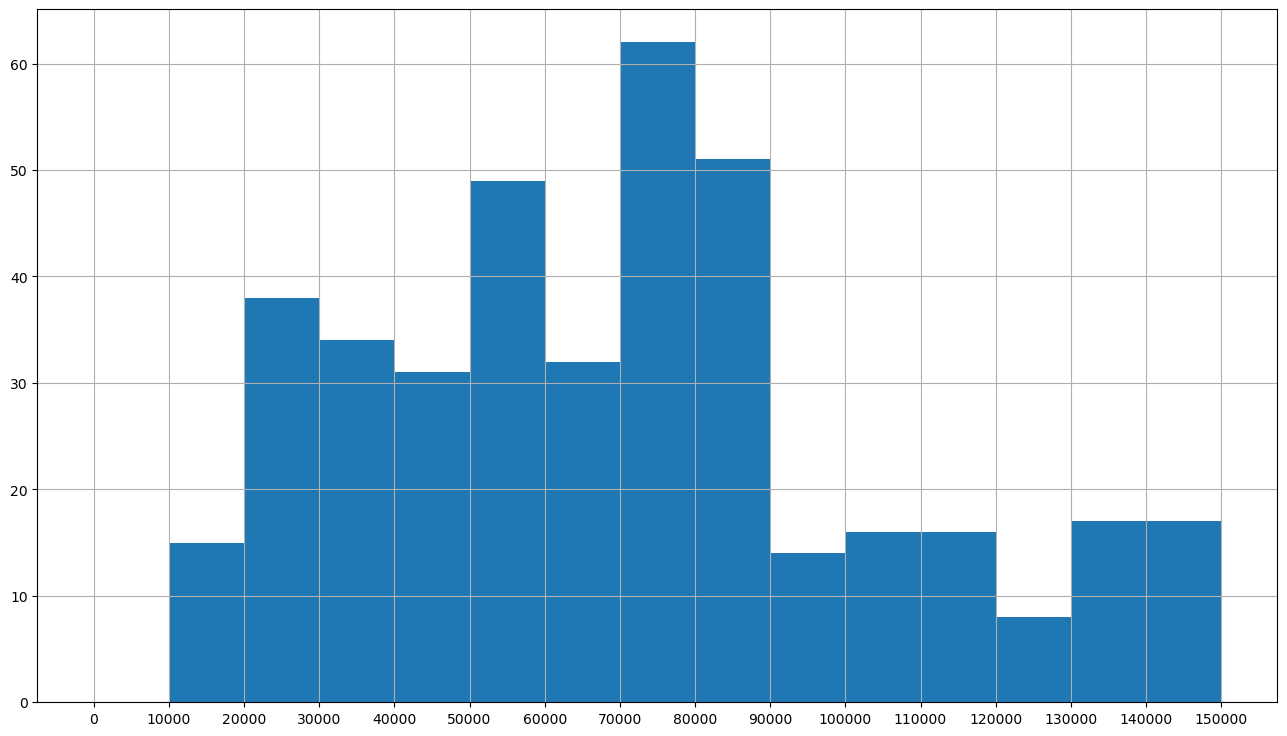

In [62]:
plt.figure(figsize=(16,9))
plt.xticks(range(0,150001, 10000))
plt.grid()
plt.hist(df['EstimatedSalary'], range(0,150001, 10000));

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


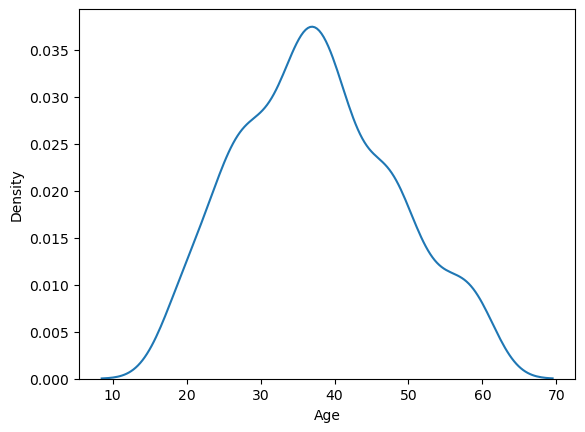

In [69]:
sns.kdeplot(df['Age']);   #kde::::kernel density 


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


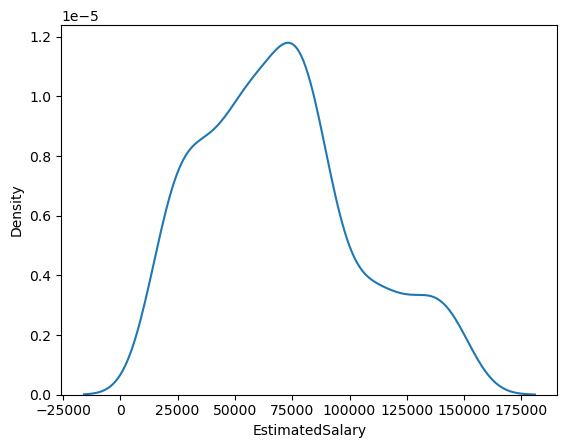

In [73]:
sns.kdeplot(df['EstimatedSalary']);   #kde::::kernel density 


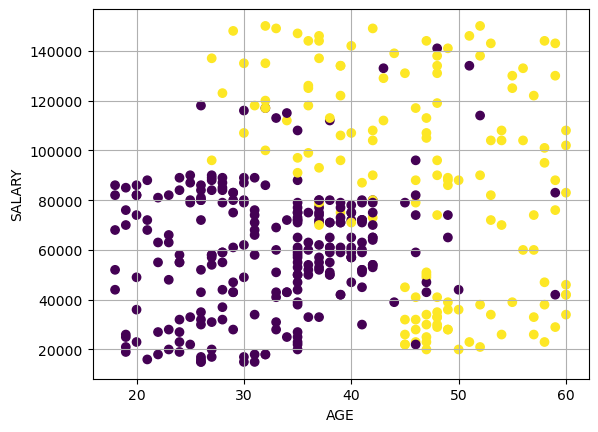

In [77]:
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


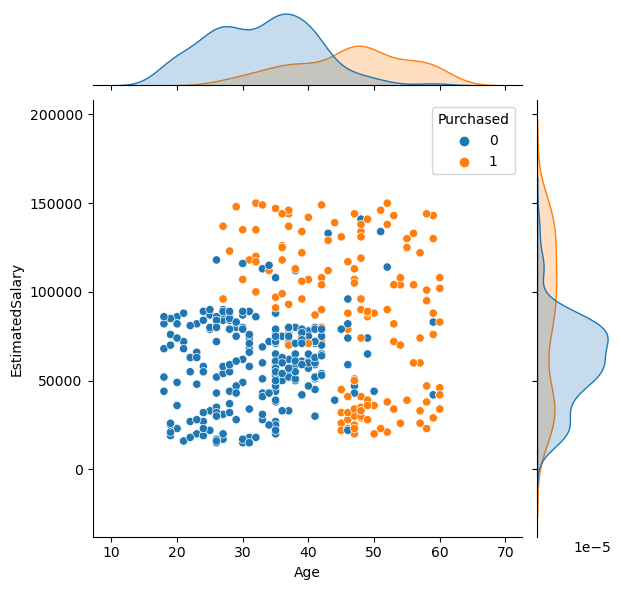

In [80]:
sns.jointplot(x= 'Age', y= 'EstimatedSalary', data = df, hue='Purchased')

###### Feature Scaling

In [111]:
# we need to scale the data as one data(estimated salary) is dominating hence to not come to all 0 in y_pred array during cross validation.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)

## cross validation

In [100]:
from sklearn.model_selection import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y,random_state=0)

In [116]:
x_train.shape

(300, 2)

In [117]:
x_test

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926],
       [0.21428571, 0.03703704],
       [0.30952381, 0.        ],
       [0.42857143, 0.95555556],
       [0.        , 0.39259259],
       [0.69047619, 0.20740741],
       [0.28571429, 0.25185185],
       [0.23809524, 0.2962963 ],
       [0.45238095, 0.2962963 ],
       [0.5       , 0.45925926],
       [0.04761905, 0.52592593],
       [0.33333333, 0.75555556],
       [0.45238095, 0.45925926],
       [0.02380952, 0.51851852],
       [0.88095238, 0.85185185],
       [0.4047619 , 0.05185185],
       [0.4047619 , 0.23703704],
       [0.69047619, 0.95555556],
       [0.54761905, 0.26666667],
       [0.69047619, 0.66666667],
       [0.11904762, 0.0962963 ],
       [0.73809524, 0.93333333],
       [0.23809524, 0.53333333],
       [0.26190476, 0.48148148],
       [0.45238095, 0.34814815],
       [0.33333333, 0.52592593],
       [0.

In [118]:
x_test.shape

(100, 2)

# Build the Model

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
classifier = LogisticRegression()

In [121]:
# train the algo
classifier.fit(x_train,y_train)

LogisticRegression()

# predict the unseen data

In [122]:
y_pred = classifier.predict(x_test)

In [123]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [124]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [125]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

### Performance Evaluation

In [139]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [140]:
print(confusion_matrix(y_test,y_pred))

[[67  1]
 [10 22]]


In [128]:
# here from above result we can conclude
# correct predication : 67+22 =89, wrong pred: 1+10=11
#2.diagonal element are matching


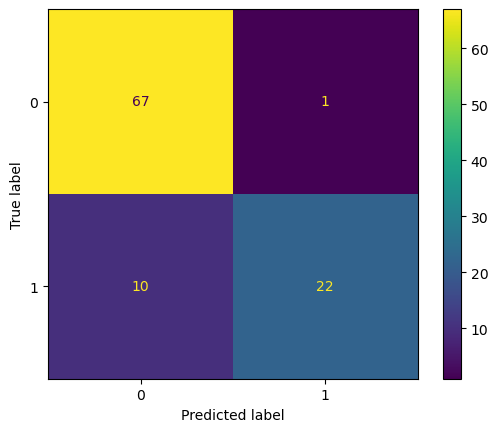

In [143]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [142]:
cm = confusion_matrix(y_test, y_pred)

In [144]:
cm.diagonal().sum() / cm.sum()

0.89

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [146]:

# precision is calculated in predicted dataset
# recall is """""""""""""""""""""" on test dataset

In [147]:
# accuracy of class 0 / sensitivity of algo
r0 = 67/68
r0 

0.9852941176470589

In [148]:
# recall - 1/ accurcy of class 1/ specifity of algorithm
r1 = 22/32
r1

0.6875

In [152]:
# precision - 0 / positive Predication Value
p0 = 67/77
p0

0.8701298701298701

In [151]:
# precision - 1 / Negative Predication Value
p1 = 22/23
p1

0.9565217391304348

In [153]:
# f1-score - 0
2* p0*r0 / (p0+ r0)

0.9241379310344828

In [154]:
# f1-score - 1
2 * p1*r1 / (p1 + r1)

0.8

In [155]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

## Prediction of  unseen data

In [157]:
new = np.array([[23,45000],[54, 1480000],[37, 63000]])

In [158]:
new

array([[     23,   45000],
       [     54, 1480000],
       [     37,   63000]])

In [187]:
# we need to scale the data as one data(estimated salary) is dominating hence to not come to all 0 in y_pred array during cross validation.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_scaled = scaler.fit_transform(new)

In [190]:
classifier.predict(new_scaled)

array([0, 1, 0], dtype=int64)

NameError: name 'x_scaled' is not defined

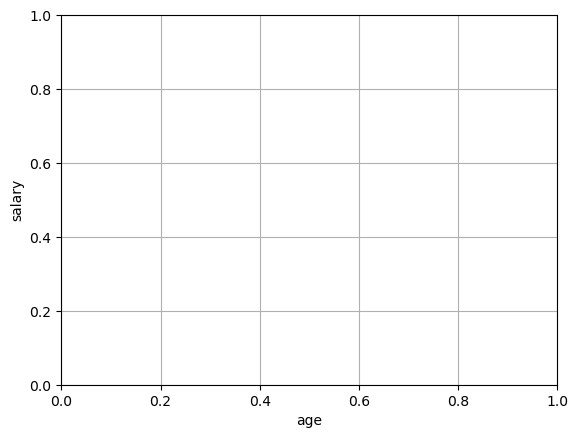

In [191]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x_scaled[:,0], x_scaled[:,1], color='cyan')
plt.scatter(new_scaled[:,0], new_scaled[:,1], color='cyan')

In [182]:
classifier.predict_proba(new_scaler)

array([[0.98353367, 0.01646633],
       [0.03421815, 0.96578185],
       [0.86395852, 0.13604148]])